In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
wine_dataset = pd.read_csv("WineQT.csv")
wine_desc = wine_dataset.describe()
print("DESCRIPTION:")
print(wine_desc)
print(wine_dataset.shape)
labels = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'quality']

DESCRIPTION:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.00

In [5]:
import copy
y = wine_dataset.quality
X = wine_dataset.drop('quality', axis = 1)
y_save = copy.deepcopy(y)
print(X.shape)
print(y.shape)
print(y.unique())

(1143, 12)
(1143,)
[5 6 7 4 8 3]


In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 12)
(800,)
(172, 12)
(172,)


In [7]:
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_val_normalized = min_max_scaler.transform(X_val)
X_test_normalized = min_max_scaler.transform(X_test)

std_scaler = StandardScaler()
X_train_standardized = std_scaler.fit_transform(X_train)
X_val_standardized = std_scaler.transform(X_val)
X_test_standardized = std_scaler.transform(X_test)
missing_values = wine_dataset.isnull().sum()

y_train_one_hot = np.eye(6)[y_train-3]
y_val_one_hot = np.eye(6)[y_val-3]

In [39]:
class MultinomialLogisticRegression:
    def __init__(self, num_classes, learning_rate=0.01, num_epochs=1000):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def one_hot_encode(self, y):
        return np.eye(self.num_classes)[y-3]
    
    def get_clone(self):
        return MultinomialLogisticRegression(self.num_classes, self.learning_rate, self.num_epochs)

    def fit(self, X, y, epochs=None, batch_size=None):
        self.num_features = X.shape[1]

        self.weights = np.random.random((self.num_features, self.num_classes))
        self.bias = np.random.random(self.num_classes)
        
        y_encoded = self.one_hot_encode(y)
        losses = []
        accuracies = []

        for epoch in range(self.num_epochs):
            Z = X@self.weights + self.bias
            A = self.softmax(Z)

            dW = (1/X.shape[0]) * np.dot(X.T, (A - y_encoded))
            db = (1/X.shape[0]) * np.sum(A - y_encoded, axis=0)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db

            # Calculate loss and accuracy for training set
            loss = self.cross_entropy_loss(y_encoded, A)
            losses.append(loss)
            y_pred = np.argmax(A, axis=1)
            accuracy = np.mean(y == y_pred)
            accuracies.append(accuracy)
        return losses, accuracies
    
    def cross_entropy_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred + 1e-15))

    def predict(self, X):
        Z = np.dot(X, self.weights) + self.bias
        A = self.softmax(Z)
        return np.argmax(A, axis=1) + 3
    
    def predict_proba(self, X):
        Z = np.dot(X, self.weights) + self.bias
        A = self.softmax(Z)
        return A

In [40]:
from sklearn.metrics import classification_report
num_classes = 6

optimal_lr = 0.002
optimal_epochs = 5000
multinmoial_model = MultinomialLogisticRegression(num_classes=num_classes, learning_rate=optimal_lr, num_epochs=optimal_epochs)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def sigmoid(x):
    clipped_x = np.clip(x, -50, 50)  # Adjust the range as needed
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def sgd_optimizer(parameters, gradients, learning_rate, batch_size):
    for param, grad in zip(parameters, gradients):
        param -= learning_rate * grad

def batch_gradient_descent(parameters, gradients, learning_rate, batch_size):
    for param, grad in zip(parameters, gradients):
        param -= (learning_rate / batch_size) * grad

def mini_batch_gradient_descent(parameters, gradients, learning_rate, batch_size):
    for param, grad in zip(parameters, gradients):
        param -= learning_rate * grad

class MLPClassifier:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.activation_function = None
        self.optimizer = None
        
        if activation == 'sigmoid':
            self.activation_function = sigmoid
        elif activation == 'tanh':
            self.activation_function = tanh
        elif activation == 'relu':
            self.activation_function = relu
        
        if optimizer == 'sgd':
            self.optimizer = sgd_optimizer
        elif optimizer == 'batch':
            self.optimizer = batch_gradient_descent
        elif optimizer == 'mini-batch':
            self.optimizer = mini_batch_gradient_descent
        
        self.weights, self.biases = self.initialize_weights_and_biases()

    def get_clone(self):
        model = MLPClassifier(input_size=self.input_size, hidden_layers=self.hidden_layers, output_size=self.output_size, learning_rate=self.learning_rate, activation=self.activation_function, optimizer=self.optimizer)
        model.activation_function = self.activation_function
        model.optimizer = self.optimizer
        return model
    
    def initialize_weights_and_biases(self):
        layer_sizes = [self.input_size] + self.hidden_layers + [self.output_size]
        weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        biases = [np.zeros(layer_size) for layer_size in layer_sizes[1:]]
        return weights, biases

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Subtract max to prevent overflow
        return exp_x / exp_x.sum(axis=1, keepdims=True)
    
    def forward_propagation(self, x):
        activations = [x]
        weighted_inputs = []
        
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            # print(" ho: " + str(z.shape))
            weighted_inputs.append(z)
            a = self.activation_function(z)
            activations.append(a)

        activations[-1] = self.softmax(activations[-1])
        return activations, weighted_inputs
    
    def backward_propagation(self, x, y, activations, weighted_inputs):
        m = x.shape[0]
        gradients = [np.zeros_like(weight) for weight in self.weights]
        bias_gradients = [np.zeros_like(bias) for bias in self.biases]

        delta = None
        if self.activation_function == sigmoid:
            delta = (activations[-1] - y) * activations[-1] * (1 - activations[-1])
            # print("sigmoid activation")
        elif self.activation_function == tanh:
            delta = (activations[-1] - y) * (1 - np.tanh(weighted_inputs[-1]) ** 2)
            # print("Tanh activation")
        elif self.activation_function == relu:
            delta = (activations[-1] - y) * (activations[-1] > 0).astype(float)
            # print("Relu activation")

        for i in range(len(self.weights) - 1, -1, -1):
            if self.activation_function == sigmoid:
                activation_derivative = activations[i] * (1 - activations[i])
            elif self.activation_function == tanh:
                if(i > 0):
                    activation_derivative = 1 - np.tanh(weighted_inputs[i-1]) ** 2
            elif self.activation_function == relu:
                activation_derivative = (activations[i] > 0).astype(float)
            
            gradients[i] = np.dot(activations[i].T, delta) / m
            bias_gradients[i] = np.sum(delta, axis=0) / m

            if(i == 0):
                continue
            delta = np.dot(delta, self.weights[i].T) * activation_derivative
        
        self.biases = [bias - self.learning_rate * bias_gradient for bias, bias_gradient in zip(self.biases, bias_gradients)]
        return gradients
    
    def one_hot_encode(self, y):
        return np.eye(self.output_size)[y-3]
    
    def fit(self, x_train, y_train, epochs, batch_size=None):
        train_losses = []
        y_train = self.one_hot_encode(y_train)
        for epoch in range(epochs):  
            self.n_samples = x_train.shape[0]
            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            X_batches = np.array_split(x_train[shuffle],self.n_samples/batch_size)
            Y_batches = np.array_split(y_train[shuffle],self.n_samples/batch_size)
            # X_batches = np.array_split(x_train, x_train.shape[0]/batch_size)
            # Y_batches = np.array_split(y_train, y_train.shape[0]/batch_size)
            for batch_x,batch_y in zip(X_batches,Y_batches):
                activations, weighted_inputs = self.forward_propagation(batch_x) 
                train_loss += -np.mean(np.log(activations[-1] + 1e-10) * batch_y)
                gradients = self.backward_propagation(batch_x, batch_y, activations, weighted_inputs)
                self.optimizer(self.weights, gradients, self.learning_rate, batch_size)

            train_loss = (train_loss/len(X_batches))
            train_losses.append(train_loss)
        self.train_lossarr = train_losses   
    
    def predict(self, x):
        activations, _ = self.forward_propagation(x)
        predictions = np.argmax(activations[-1], axis=1)
        return predictions + 3
    
    def predict_proba(self, x):
        activations, _ = self.forward_propagation(x)
        return activations[-1]
    
    def calculate_metrics(self, X, y):
        activations, _ = self.forward_propagation(X)
        predicted_labels = np.argmax(activations[-1], axis=1) + 3
        return accuracy_score(y,predicted_labels), precision_score(y,predicted_labels,zero_division=1,average='weighted'), recall_score(y,predicted_labels,zero_division=1,average='weighted'), f1_score(y,predicted_labels,zero_division=1,average='weighted')
    
    def calculate_report(self, X, y):
        activations, _ = self.forward_propagation(X)

        predicted_labels = np.argmax(activations[-1], axis=1) + 3
        report = classification_report(y, predicted_labels,zero_division=1)
        return report

    def calc_loss(self, x, y):
        activations, _ = self.forward_propagation(x)
        loss = -np.mean(np.log(activations[-1] + 1e-10) * y)
        return loss

In [30]:
wine_data = pd.read_csv("WineQT.csv")
y = wine_data.quality
X = wine_data.drop('quality', axis = 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_val = std_scaler.transform(X_val)
X_test = std_scaler.transform(X_test)

input_size = X_train.shape[1]
output_size = 6  
y_train_one_hot = np.eye(output_size)[y_train-3]
y_val_one_hot = np.eye(output_size)[y_val-3]

optimal_mlp_lr = 0.03
optimal_mlp_epochs = 100
optimal_mlp_hidden = [6, 6]
optimal_mlp_activation = 'relu'
optimal_mlp_optimizer = 'mini-batch'
optimal_mlp_batch_size = 8

mlp_model = MLPClassifier(input_size=input_size, hidden_layers=optimal_mlp_hidden, output_size=output_size, learning_rate=optimal_mlp_lr, activation=optimal_mlp_activation, optimizer=optimal_mlp_optimizer)

In [12]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
criteria = ['gini', 'entropy']
max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

best_accuracy = 0
best_params = {}

for criterion in criteria:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            for min_samples_leaf in min_samples_leaf_values:
                decision_tree_classifier = DecisionTreeClassifier(
                    criterion=criterion,
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf
                )

                decision_tree_classifier.fit(X_train, y_train)
                y_pred = decision_tree_classifier.predict(X_val)
                accuracy = accuracy_score(y_val, y_pred)
                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        "criterion": criterion,
                        "max_depth": max_depth,
                        "min_samples_split": min_samples_split,
                        "min_samples_leaf": min_samples_leaf
                    }

In [13]:
print("Best Accuracy on tuning Decision-Tree Classifier is: " + str(best_accuracy*100)+"%")
print("Best Parameters on tuning Decision-Tree Classifier is: " + str(best_params))

Best Accuracy on tuning Decision-Tree Classifier is: 63.74269005847953%
Best Parameters on tuning Decision-Tree Classifier is: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import random
import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# import clone
from sklearn.base import clone

class BaggingClassifier():
    def __init__(self, base_estimator, n_estimators, max_samples, bootstrap, voting="hard"):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.bootstrap = bootstrap
        self.voting = voting

    def fit(self, X, y, epochs=None, batch_size=None):
        self.estimators = []
        num_samples = len(X)
        for _ in range(self.n_estimators):
            if self.bootstrap:
                sample_indices = [random.randint(0, num_samples - 1) for _ in range(num_samples)]
            else:
                sample_indices = random.sample(range(num_samples), int(self.fraction_samples * num_samples))

            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            estimator = None

            if hasattr(self.base_estimator, "get_clone"):
                estimator = self.base_estimator.get_clone()
            else:
                estimator = clone(self.base_estimator)

            estimator.fit(X_sampled, y_sampled, epochs, batch_size)
            self.estimators.append(estimator)

    def predict(self, X):
        if self.voting == "hard":
            predictions = [estimator.predict(X) for estimator in self.estimators]
            return np.round(np.mean(predictions, axis=0))
        elif self.voting == "soft":
            probabilities = [estimator.predict_proba(X) for estimator in self.estimators]
            for i, prob_matrix in enumerate(probabilities):
                zeros_to_add = 6 - prob_matrix.shape[1]
                probabilities[i] = np.pad(prob_matrix, ((0, 0), (0, zeros_to_add)), mode='constant')
            mean_probabilities = np.mean(probabilities, axis=0)
            return np.argmax(mean_probabilities, axis=1)+3

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

In [18]:
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(), 10, 0.15, True, "hard")

bagging_classifier.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
bagging_classifier.accuracy(X_test, y_test)

0.5930232558139535

In [21]:
bagging_classifier = BaggingClassifier(mlp_model, 5, 0.5, True, "soft")
bagging_classifier.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
bagging_classifier.accuracy(X_val, y_val)

0.6374269005847953

In [20]:
bagging_classifier = BaggingClassifier(multinmoial_model, 10, 1, True, "hard")
bagging_classifier.fit(X_train, y_train, optimal_epochs, optimal_mlp_batch_size)
bagging_classifier.accuracy(X_test, y_test)

0.6162790697674418

In [22]:
base_estimators = {
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1),
    "Logistic Regression": multinmoial_model,
    "MLP": mlp_model
}

n_estimators = [5, 10, 20]
max_samples = [0.15, 0.25, 0.5]
voting = ["hard", "soft"]
bootstrap = [True, False]

results = []

for base_name, base_estimator in base_estimators.items():
    for n_estimator in n_estimators:
        for max_sample in max_samples:
            for vote in voting:
                bagging_classifier = BaggingClassifier(
                    base_estimator=base_estimator,
                    n_estimators=n_estimator,
                    max_samples=max_sample,
                    bootstrap=True,  
                    voting=vote
                )
                
                bagging_classifier.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
                predicted_val = bagging_classifier.predict(X_val)
                accuracy = -1
                accuracy = accuracy_score(y_val, bagging_classifier.predict(X_val))

                # print(f"Base Estimator: {base_name}, n_estimators: {n_estimator}, max_samples: {max_sample}, Voting: {vote}, Accuracy: {accuracy}")
                results.append({
                    "Base Estimator": base_name,
                    "n_estimators": n_estimator,
                    "max_samples": max_sample,
                    "Voting": vote,
                    "Validation Accuracy": accuracy
                })

sorted_results = sorted(results, key=lambda x: x["Validation Accuracy"], reverse=True)

print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+---------------------+--------------+-------------+--------+---------------------+
|   Base Estimator    | n_estimators | max_samples | Voting | Validation Accuracy |
+---------------------+--------------+-------------+--------+---------------------+
|    Decision Tree    |      20      |    0.15     |  soft  | 0.6842105263157895  |
|         MLP         |      10      |     0.5     |  soft  | 0.6842105263157895  |
|    Decision Tree    |      10      |     0.5     |  hard  | 0.6783625730994152  |
|         MLP         |      20      |     0.5     |  soft  | 0.6783625730994152  |
|    Decision Tree    |      10      |    0.15     |  hard  |  0.672514619883041  |
|    Decision Tree    |      20      |    0.25     |  hard  |  0.672514619883041  |
|    Decision Tree    |      20      |    0.25     |  soft  |  0.672514619883041  |
|    Decision Tree    |      20      |    0.15     |  hard  | 0.6666666666666666  |
|    Decision Tree    |      20      |     0.5     |  soft  | 0.666666666666

Base Estimator  Decision Tree  Logistic Regression       MLP
max_samples                                                 
0.15                 0.684211             0.625731  0.660819
0.25                 0.672515             0.649123  0.666667
0.50                 0.678363             0.614035  0.684211


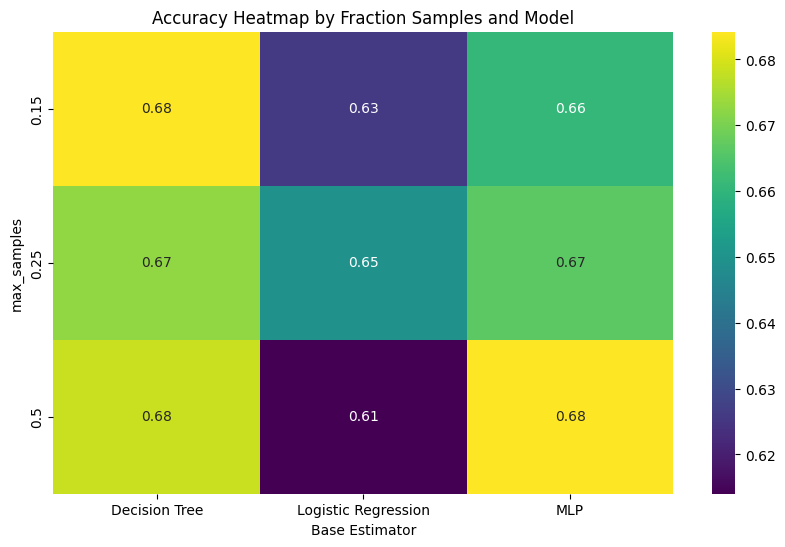

In [23]:
df = pd.DataFrame(sorted_results)
df = df.drop_duplicates(subset=['Base Estimator', 'max_samples'])

heatmap_data = df.pivot(
    index="max_samples",
    columns="Base Estimator",
    values="Validation Accuracy",
)

print(heatmap_data)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Accuracy Heatmap by Fraction Samples and Model")
plt.show()

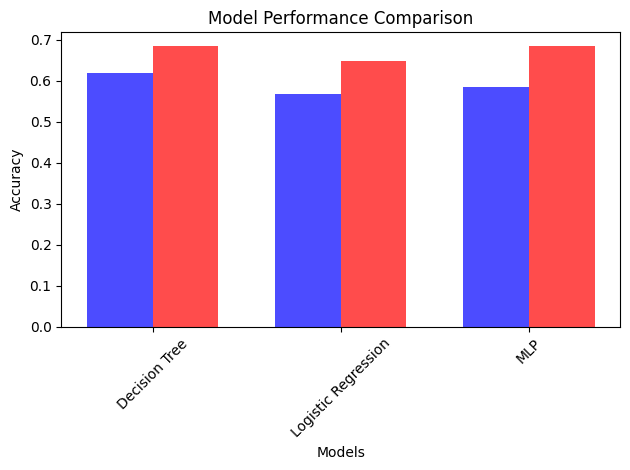

In [24]:
base_estimators = {
    "Decision Tree": DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2, min_samples_leaf=1),
    "Logistic Regression": multinmoial_model,
    "MLP": mlp_model
}

base_model_accuracies = {}

for model_name, base_model in base_estimators.items():
    base_model.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
    y_pred = base_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    base_model_accuracies[model_name] = accuracy

best_accuracies = {}

for result in results:
    model = result["Base Estimator"]
    accuracy = result["Validation Accuracy"]
    
    if model in best_accuracies:
        best_accuracies[model] = max(best_accuracies[model], accuracy)
    else:
        best_accuracies[model] = accuracy

model_names = list(best_accuracies.keys())
best_accuracies_values = list(best_accuracies.values())
base_accuracies = list(base_model_accuracies.values())

# Create an array for the x-axis (model names)
x = np.arange(len(model_names))

# Set the width of the bars
width = 0.35

# Create the figure and axis objects
fig, ax = plt.subplots()


# Plot the base model accuracies
ax.bar(x, base_accuracies, width, label='Base Models', alpha=0.7, color='blue')

# Plot the best ensemble accuracies
ax.bar(x + width, best_accuracies_values, width, label='Best Ensemble', alpha=0.7, color='red')

# Set the x-axis labels
ax.set_xticks(x + width / 2)
ax.set_xticklabels(model_names)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Comparison')

# Add a legend
# ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [16]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [63]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

y = np.array(y)

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_housing, X_val_housing, y_train_housing, y_val_housing = train_test_split(X_train_housing, y_train_housing, test_size=0.2, random_state=42)
X_train_housing.fillna(X_train_housing.mean(), inplace=True)
X_val_housing.fillna(X_val_housing.mean(), inplace=True)
X_test_housing.fillna(X_test_housing.mean(), inplace=True)


std_scaler = StandardScaler()  
X_train_housing = std_scaler.fit_transform(X_train_housing)
X_val_housing = std_scaler.transform(X_val_housing)
X_test_housing = std_scaler.transform(X_test_housing)

y_train_housing = y_train_housing.reshape(-1,1)
y_test_housing = y_test_housing.reshape(-1,1)
y_val_housing = y_val_housing.reshape(-1,1)

In [18]:
max_depth_values = [None, 5, 10, 15, 20]
min_samples_split_values = [2, 5, 10]
min_samples_leaf_values = [1, 2, 4]

best_mse = float('inf')
best_params = {}

for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            decision_tree_regressor = DecisionTreeRegressor(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf
            )
            
            decision_tree_regressor.fit(X_train_housing, y_train_housing)

            y_pred = decision_tree_regressor.predict(X_val_housing)

            mse = mean_squared_error(y_val_housing, y_pred)
            
            if mse < best_mse:
                best_mse = mse
                best_params = {
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf
                }

print("Best MSE on tuning Decision-Tree Regressor is: " + str(best_mse))
print("Best Parameters on tuning Decision-Tree Regressor is: " + str(best_params))

Best MSE on tuning Decision-Tree Regressor is: 21.1316147804435
Best Parameters on tuning Decision-Tree Regressor is: {'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 4}


In [29]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def sgd_optimizer(weights, gradients, learning_rate, batch_size=None):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]

def batch_gradient_descent(weights, gradients, learning_rate, batch_size=None):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]

def mini_batch_gradient_descent(weights, gradients, learning_rate, batch_size):
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients[i]

class MLP_Regressor:
    def __init__(self, input_size, hidden_layers, output_size, learning_rate=0.01, activation='sigmoid', optimizer='sgd'):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.activation_function = None
        self.optimizer = None
        
        if activation == 'sigmoid':
            self.activation_function = sigmoid
        elif activation == 'tanh':
            self.activation_function = tanh
        elif activation == 'relu':
            self.activation_function = relu
        
        if optimizer == 'sgd':
            self.optimizer = sgd_optimizer
        elif optimizer == 'batch':
            self.optimizer = batch_gradient_descent
        elif optimizer == 'mini-batch':
            self.optimizer = mini_batch_gradient_descent
        
        self.weights, self.biases = self.initialize_weights_and_biases()

    def get_clone(self):
        model = MLP_Regressor(input_size=self.input_size, hidden_layers=self.hidden_layers, output_size=self.output_size, learning_rate=self.learning_rate, activation=self.activation_function, optimizer=self.optimizer)
        model.activation_function = self.activation_function
        model.optimizer = self.optimizer
        return model
    
    def initialize_weights_and_biases(self):
        layer_sizes = [self.input_size] + self.hidden_layers + [self.output_size]
        weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes) - 1)]
        biases = [np.zeros(layer_size) for layer_size in layer_sizes[1:]]
        return weights, biases
    
    def forward_propagation(self, x):
        activations = [x]
        weighted_inputs = []
        
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            weighted_inputs.append(z)
            a = self.activation_function(z)
            if i == (len(self.weights) - 1):
                activations.append(z)
                break
            activations.append(a)
        return activations, weighted_inputs
    
    def backward_propagation(self, x, y, activations, weighted_inputs):
        m = x.shape[0]
        gradients = [np.zeros_like(weight) for weight in self.weights]
        bias_gradients = [np.zeros_like(bias) for bias in self.biases]
        
        delta = None
        if self.activation_function == sigmoid:
            delta = (activations[-1] - y) * activations[-1] * (1 - activations[-1])
        elif self.activation_function == tanh:
            delta = (activations[-1] - y) * (1 - np.tanh(activations[-1]) ** 2)
        elif self.activation_function == relu:
            delta = (activations[-1] - y) * (activations[-1] > 0).astype(float)

        for i in range(len(self.weights) - 1, -1, -1):
            if self.activation_function == sigmoid:
                activation_derivative = activations[i] * (1 - activations[i])
            elif self.activation_function == tanh:
                if(i > 0):
                    activation_derivative = 1 - np.tanh(weighted_inputs[i-1]) ** 2
            elif self.activation_function == relu:
                activation_derivative = (activations[i] > 0).astype(float)
            
            gradients[i] = np.dot(activations[i].T, delta) / m
            bias_gradients[i] = np.sum(delta, axis=0) / m
            if(i == 0):
                continue
            delta = np.dot(delta, self.weights[i].T) * activation_derivative

        self.biases = [bias - self.learning_rate * bias_gradient for bias, bias_gradient in zip(self.biases, bias_gradients)]
        return gradients
    
    def fit(self, x_train, y_train, epochs, batch_size=None):
        train_losses = []
        for epoch in range(epochs):  
            self.n_samples = x_train.shape[0]
            shuffle = np.random.permutation(self.n_samples)
            train_loss = 0
            valid_loss = 0
            if batch_size is not None:
                X_batches = np.array_split(x_train[shuffle], len(x_train) // batch_size)
                Y_batches = np.array_split(y_train[shuffle].reshape(-1, 1), len(y_train) // batch_size)  # Reshape y
            else:
                X_batches = [x_train[shuffle]]
                Y_batches = [y_train[shuffle].to_numpy().reshape(-1, 1)] 

            for batch_x, batch_y in zip(X_batches, Y_batches):
                activations, weighted_inputs = self.forward_propagation(batch_x) 
                train_loss += np.mean((activations[-1] - batch_y) ** 2)
                gradients = self.backward_propagation(batch_x, batch_y, activations, weighted_inputs)
                self.optimizer(self.weights, gradients, self.learning_rate, batch_size)

            train_loss = (train_loss / len(X_batches))
            train_losses.append(train_loss)
        self.train_lossarr = train_losses  
    
    def predict(self, x):
        activations, _ = self.forward_propagation(x)
        predictions = activations[-1]
        return predictions
    
    def predict_proba(self, x):
        activations, _ = self.forward_propagation(x)
        return activations[-1]

    def calc_loss(self, x, y):
        activations, _ = self.forward_propagation(x)
        loss = np.mean((activations[-1] - y) ** 2)
        return loss

In [20]:
best_params_mse = {'Activation': 'relu', 'Optimizer': 'mini-batch', 'Epochs': 500, 'Learning Rate': 0.0001, 'Hidden Neurons': [8, 6]}
activation = best_params_mse['Activation']
optimizer = best_params_mse['Optimizer']
epoch = best_params_mse['Epochs']
learning_rate = best_params_mse['Learning Rate']
hn = best_params_mse['Hidden Neurons']
mlp_regressor_model = MLP_Regressor(input_size=13, hidden_layers=hn, output_size=1, learning_rate=learning_rate, activation=activation, optimizer=optimizer)

In [22]:
# Reference: https://chat.openai.com/share/26ff0ca0-0c31-4b44-994c-16d37694d462
class LinearRegression_:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y, epochs=None, batch_size=None):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            y_predicted = y_predicted.reshape(-1,1)
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(self, y_true, y_pred):
        y_mean = np.mean(y_true)
        ss_total = np.sum((y_true - y_mean) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def fit_and_evaluate(self, X_train, y_train, X_test, y_test):
        self.fit(X_train, y_train)
        y_pred = self.predict(X_test)
        mse = self.mean_squared_error(y_test, y_pred)
        r2 = self.r_squared(y_test, y_pred)
        return mse, r2
    
    def get_clone(self):
        return LinearRegression_(self.learning_rate, self.n_iterations)


In [124]:
class BaggingRegressor:
    def __init__(self, base_regressor, n_estimators, max_samples, bootstrap=True, voting="hard"):
        self.base_regressor = base_regressor
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.regressors = []
        self.losses = []

    def fit(self, X, y, epochs=None, batch_size=None):
        for _ in range(self.n_estimators):
            if self.bootstrap:
                sample_indices = np.random.choice(X.shape[0], size=int(self.max_samples * X.shape[0]), replace=True)
            else:
                sample_indices = np.random.choice(X.shape[0], size=int(self.max_samples * X.shape[0]), replace=False)

            X_sampled = X[sample_indices]
            y_sampled = y[sample_indices]
            
            # regressor = self.base_regressor.__class__(**self.base_regressor.get_params())
            regressor = None
            if hasattr(self.base_regressor, "get_clone"):
                regressor = self.base_regressor.get_clone()
            else:
                regressor = clone(self.base_regressor)

            regressor.fit(X_sampled, y_sampled, epochs, batch_size)
            self.regressors.append(regressor)
            y_pred = regressor.predict(X)
            loss = np.mean((y - y_pred) ** 2)
            self.losses.append(loss)

        final_loss = 0
        for estimator in self.regressors:
            y_pred = estimator.predict(X)
            loss = np.mean((y - y_pred) ** 2)
            final_loss += loss

        return final_loss

    def predict(self, X):
        if self.voting == "hard":
            predictions = [regressor.predict(X) for regressor in self.regressors]
            return np.mean(predictions, axis=0)
        elif self.voting == "soft":
            predictions = [regressor.predict(X) for regressor in self.regressors]
            return np.mean(predictions, axis=0)

    def get_loss(self, X, y):
        loss = 0
        for estimator in self.regressors:
            y_pred = estimator.predict(X)
            loss = np.mean((y - y_pred) ** 2)
            loss += loss
        loss /= self.n_estimators
        return loss

    def get_params(self):
        return {'learning_rate': self.learning_rate, 'n_iterations': self.n_iterations}

In [117]:
bagging_regressor = BaggingRegressor(DecisionTreeRegressor(max_depth=15), 10, 0.85, True, "hard")
bagging_regressor.fit(X_train_housing, y_train_housing, optimal_mlp_epochs, optimal_mlp_batch_size)
bagging_regressor.predict(X_val_housing)
bagging_regressor.get_loss(X_val_housing, y_val_housing)

26.20283493369913

In [120]:
bagging_regressor = BaggingRegressor(mlp_regressor_model, 10, 0.85, True, "hard")
bagging_regressor.fit(X_train_housing, y_train_housing, epoch, 8)
bagging_regressor.predict(X_val_housing)
bagging_regressor.get_loss(X_val_housing, y_val_housing)

5.124355484132771

In [100]:
bagging_regressor = BaggingRegressor(LinearRegression_(learning_rate=0.01, n_iterations=1000), 10, 0.85, True, "hard")
bagging_regressor.fit(X_train_housing, y_train_housing, epoch, 20)
bagging_regressor.predict(X_val_housing)
bagging_regressor.get_loss(X_val_housing, y_val_housing)

4.6750279304881746

In [125]:
base_models = [
    ("Linear Regression", LinearRegression_()),
    ("MLP Regression", mlp_regressor_model),
    ("Decision Tree Regression", DecisionTreeRegressor())
]

n_estimators_values = [5, 10, 20]
max_samples_values = [0.2, 0.5, 0.85]
bootstrap_values = [True, False]
voting_values = ['hard', 'soft']

results = []

for base_name, base_model in base_models:
    
    best_params = None
    best_score = float('inf')
    
    for n_estimators in n_estimators_values:
        for max_samples in max_samples_values:
            for bootstrap in bootstrap_values:
                for voting in voting_values:
                    bagging_regressor = BaggingRegressor(base_regressor=base_model, 
                                                       n_estimators=n_estimators,
                                                       max_samples=max_samples,
                                                       bootstrap=bootstrap,
                                                       voting=voting)
                    
                    bagging_regressor.fit(X_train_housing, y_train_housing, epoch, 10)
                    mse = mean_squared_error(y_val_housing, bagging_regressor.predict(X_val_housing))
                    
                    results.append({
                        "Base Estimator": base_name,
                        "n_estimators": n_estimators,
                        "max_samples": max_samples,
                        "Voting": voting,
                        "Bootstrap": bootstrap,
                        "Validation MSE": mse
                    })

sorted_results = sorted(results, key=lambda x: x["Validation MSE"])

print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+--------------------------+--------------+-------------+--------+-----------+--------------------+
|      Base Estimator      | n_estimators | max_samples | Voting | Bootstrap |   Validation MSE   |
+--------------------------+--------------+-------------+--------+-----------+--------------------+
| Decision Tree Regression |      10      |     0.5     |  soft  |   False   | 13.402929629629629 |
| Decision Tree Regression |      10      |     0.5     |  soft  |   True    | 13.754343209876549 |
| Decision Tree Regression |      20      |     0.5     |  hard  |   True    | 14.665410185185184 |
| Decision Tree Regression |      20      |    0.85     |  soft  |   True    | 15.32171172839506  |
| Decision Tree Regression |      5       |    0.85     |  hard  |   True    | 15.876587654320991 |
|      MLP Regression      |      5       |    0.85     |  soft  |   False   |  16.7224402843735  |
|      MLP Regression      |      20      |    0.85     |  soft  |   False   | 17.051799397974253 |


Base Estimator  Decision Tree Regression  Linear Regression  MLP Regression
max_samples                                                                
0.20                           17.365597          24.360838       28.257814
0.50                           13.402930          24.099188       19.753848
0.85                           15.321712          24.229558       16.722440


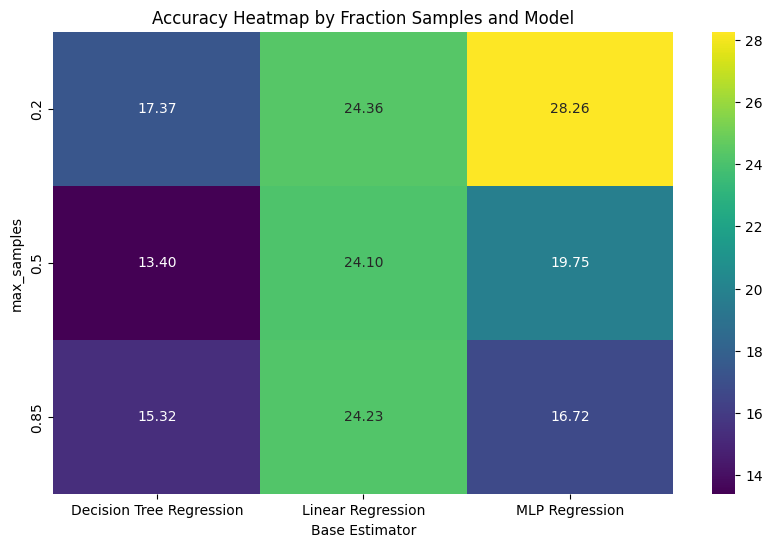

In [128]:
df = pd.DataFrame(sorted_results)
df = df.drop_duplicates(subset=['Base Estimator', 'max_samples'])

heatmap_data = df.pivot_table(
    index="max_samples",
    columns="Base Estimator",
    values="Validation MSE",
    aggfunc="min"
)

print(heatmap_data)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title("Accuracy Heatmap by Fraction Samples and Model")
plt.show()

{'Linear Regression': 26.352935879462585, 'MLP Regression': 17.86638569542337, 'Decision Tree Regression': 25.4913725490196}
{'Decision Tree Regression': 13.402929629629629, 'MLP Regression': 16.7224402843735, 'Linear Regression': 24.09918750214789}


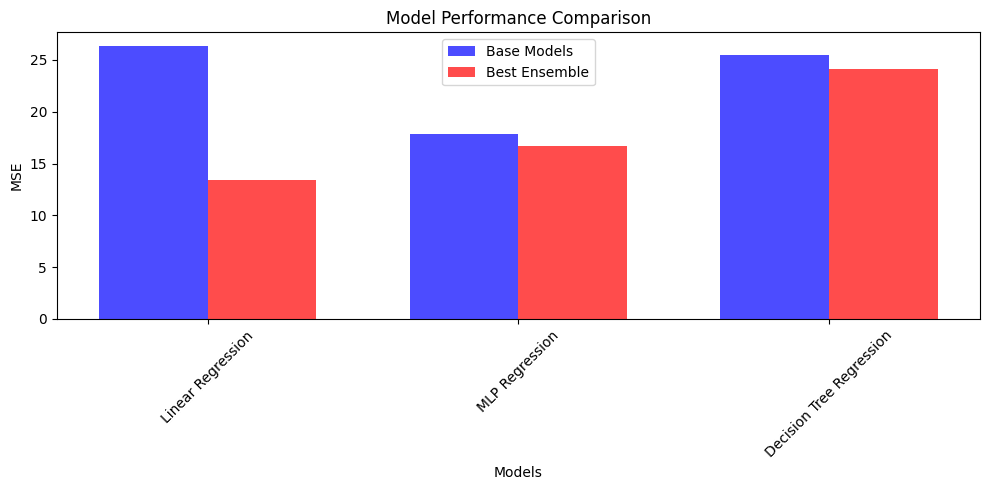

In [129]:
# Reference to plot model performance comparison: https://chat.openai.com/share/26ff0ca0-0c31-4b44-994c-16d37694d462
import matplotlib.pyplot as plt

base_model_mse = {}
for model_name, base_model in base_models:
    base_model.fit(X_train_housing, y_train_housing, epoch, 20)
    y_pred = base_model.predict(X_test_housing)
    mse = mean_squared_error(y_test_housing, y_pred)
    base_model_mse[model_name] = mse
    
print(base_model_mse)

best_mse = {}

for result in sorted_results:
    model = result["Base Estimator"]
    mse = result["Validation MSE"]
    
    if model in best_mse:
        best_mse[model] = min(best_mse[model], mse)
    else:
        best_mse[model] = mse

        
print(best_mse)

# Extract model names and accuracies
models = list(base_model_mse.keys())
base_accuracies = list(base_model_mse.values())
ensemble_accuracies = list(best_mse.values())

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
index = np.arange(len(models))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the base model accuracies
ax.bar(index, base_accuracies, bar_width, label='Base Models', alpha=0.7, color='blue')

# Plot the best ensemble accuracies
ax.bar(index + bar_width, ensemble_accuracies, bar_width, label='Best Ensemble', alpha=0.7, color='red')

# Set the x-axis labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)

# Set labels and title
ax.set_xlabel('Models')
ax.set_ylabel('MSE')
ax.set_title('Model Performance Comparison')

# Add a legend
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [27]:
wine_data = pd.read_csv("WineQT.csv")
y = wine_data.quality
X = wine_data.drop('quality', axis = 1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_val = std_scaler.transform(X_val)
X_test = std_scaler.transform(X_test)

input_size = X_train.shape[1]
output_size = 6  
y_train_one_hot = np.eye(output_size)[y_train-3]
y_val_one_hot = np.eye(output_size)[y_val-3]

In [46]:
from sklearn.base import clone
from sklearn.model_selection import KFold

# Reference: Chatgpt https://chat.openai.com/share/26ff0ca0-0c31-4b44-994c-16d37694d462

class StackingClassifier():
    def __init__(self, level0_estimators, level1_estimators, use_blending=False, n_folds=5):
        self.level0_estimators = level0_estimators
        self.level1_estimators = level1_estimators
        self.use_blending = use_blending
        self.n_folds = n_folds if not use_blending else None

    def fit(self, X_train, y_train, X_val=None, y_val=None, optimal_mlp_epochs=None, optimal_mlp_batch_size=None):
        if self.use_blending:
            if X_val is None or y_val is None:
                raise ValueError("Validation set required for blending.")
            
            self._fit_blending(X_train, y_train, X_val, y_val, optimal_mlp_epochs, optimal_mlp_batch_size) # Blending uses a holdout validation set
        else:
            self._fit_stacking(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size) # Stacking uses K-Fold cross-validation on the training set

    def _fit_stacking(self, X_train, y_train, optimal_mlp_epochs=None, optimal_mlp_batch_size=None):
        kf = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        level0_features = np.zeros((X_train.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            fold_predictions = []
            for train_index, test_index in kf.split(X_train):
                if hasattr(estimator, 'get_clone'):
                    estimator_clone = estimator.get_clone()  # For custom models
                else:
                    estimator_clone = clone(estimator)  # For sklearn models
                # Fit the cloned model
                estimator_clone.fit(X_train[train_index], y_train[train_index], optimal_mlp_epochs, optimal_mlp_batch_size)
                fold_predictions.append(estimator_clone.predict(X_train[test_index]))

            # Stack the out-of-fold predictions as new features for level-1
            level0_features[:, i] = np.concatenate(fold_predictions)

            # Retrain the original estimator on the full training set if necessary
            if hasattr(estimator, 'fit'):
                estimator.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)

        # Train each level-1 estimator with the stacked features
        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)


    def _fit_blending(self, X_train, y_train, X_val, y_val, optimal_mlp_epochs=None, optimal_mlp_batch_size=None):
        level0_features = np.zeros((X_val.shape[0], len(self.level0_estimators)))

        # Train each Level-0 estimator on the full training set and predict on the validation set
        for i, estimator in enumerate(self.level0_estimators):
            # if hasattr(estimator, 'get_clone'):
            #     # For custom models that have a get_clone method
            #     estimator_clone = estimator.get_clone()
            # else:
            #     # For sklearn models or models that can be deep-copied safely
            #     estimator_clone = clone(estimator)

            estimator_clone = estimator

            # Fit the cloned estimator on the full training data
            estimator_clone.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)

            # Generate predictions on the validation set to be used as features for Level-1
            level0_features[:, i] = estimator_clone.predict(X_val)

        # Train each Level-1 estimator on the predictions made on the validation set
        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_val, optimal_mlp_epochs, optimal_mlp_batch_size)

    # def predict(self, X_test):
    #     level0_predictions = np.column_stack([
    #         estimator.predict_proba(X_test)[:, 1] if hasattr(estimator, 'predict_proba') else estimator.predict(X_test)
    #         for estimator in self.level0_estimators
    #     ])
        
    #     # Assuming there's only one Level-1 estimator based on your code
    #     level1_predictions = self.level1_estimators[0].predict(level0_predictions)
        
    #     return level1_predictions

    def predict(self, X_test):
        level0_predictions = np.column_stack([
            estimator.predict(X_test) for estimator in self.level0_estimators
        ])

        level1_predictions = np.column_stack([
            estimator.predict(level0_predictions) for estimator in self.level1_estimators
        ])

        return np.round(np.mean(level1_predictions, axis=1))

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)

level0_estimators = [DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2, min_samples_leaf=1), multinmoial_model, mlp_model]
level1_estimators = [MultinomialLogisticRegression(num_classes=6), DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_split=2, min_samples_leaf=1)]

stacking_classifier = StackingClassifier(level0_estimators=level0_estimators, level1_estimators=level1_estimators, use_blending=False)
stacking_classifier.fit(X_train, y_train, None, None ,optimal_mlp_epochs, optimal_mlp_batch_size)

predictions = stacking_classifier.predict(X_test)
accuracy = stacking_classifier.accuracy(X_test, y_test)
print(f"Stacking Classifier Test Accuracy: {accuracy}")

Stacking Classifier Test Accuracy: 0.5465116279069767


In [48]:
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Define the base models using the best hyperparameters
base_models = {
    'DecisionTree': DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=1),
    'LogisticRegression': multinmoial_model,
    'MLPClassifier': mlp_model
}

level0_estimators = [[DecisionTreeClassifier(criterion='gini', max_depth=10), mlp_model], [DecisionTreeClassifier(criterion="gini", max_depth=10), mlp_model, multinmoial_model]]

stacking_params = [
    {'n_folds': 5, 'use_blending': True},
    {'n_folds': 5, 'use_blending': False},
    {'n_folds': 10, 'use_blending': True},
    {'n_folds': 10, 'use_blending': False},
]

# Placeholder to store the performance of each model
performance_results = []

# for level0_estimator in level0_estimators:
#     for model_name, base_model in level1_estimators.items():
#             for stacking_param in stacking_params:
#                 base_model.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
#                 start_time = time.time()
#                 stacking_classifier = StackingClassifier(level0_estimators=level0_estimator, level1_estimators=[base_model], **stacking_param)
#                 stacking_classifier.fit(X_train, y_train, X_val, y_val, optimal_mlp_epochs, optimal_mlp_batch_size)
#                 end_time = time.time()

#                 stacking_accuracy = stacking_classifier.accuracy(X_test, y_test)
#                 stacking_train_time = end_time - start_time

#                 performance_results.append({
#                     'Level-0 Model': level0_estimator,
#                     'Level-1 Model': f'Stacking_{model_name}',
#                     'Stacking Param': stacking_param,
#                     'accuracy': stacking_accuracy,
#                     'train_time': stacking_train_time,
#                 })

# Iterate over each base model
for model_name, base_model in base_models.items():
    for stacking_param in stacking_params:
        base_model.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
        start_time = time.time()
        stacking_classifier = StackingClassifier(level0_estimators=[base_model], level1_estimators=[MultinomialLogisticRegression(num_classes=6), DecisionTreeClassifier(criterion='gini', max_depth=10)], **stacking_param)
        stacking_classifier.fit(X_train, y_train, X_val, y_val, optimal_mlp_epochs, optimal_mlp_batch_size)
        end_time = time.time()

        # Evaluate the classifier
        stacking_accuracy = accuracy_score(y_val, stacking_classifier.predict(X_val))
        stacking_train_time = end_time - start_time

        # Record the performance
        performance_results.append({
            'model': f'Stacking_{model_name}',
            'params': stacking_param,
            'accuracy': stacking_accuracy,
            'train_time': stacking_train_time,
        })

best_stacking = max((res for res in performance_results if 'Stacking' in res['model']), key=lambda x: x['accuracy'])

print(f"Best Stacking Model: {best_stacking}")

# display the results in a nice tabular format after sorting according to the accuracy
performance_results = sorted(performance_results, key=lambda x: x['accuracy'], reverse=True)
print(tabulate.tabulate(performance_results, headers="keys", tablefmt="pretty"))

Best Stacking Model: {'model': 'Stacking_MLPClassifier', 'params': {'n_folds': 5, 'use_blending': False}, 'accuracy': 0.5906432748538012, 'train_time': 6.482083082199097}
+-----------------------------+----------------------------------------+---------------------+---------------------+
|            model            |                 params                 |      accuracy       |     train_time      |
+-----------------------------+----------------------------------------+---------------------+---------------------+
|   Stacking_MLPClassifier    | {'n_folds': 5, 'use_blending': False}  | 0.5906432748538012  |  6.482083082199097  |
| Stacking_LogisticRegression | {'n_folds': 5, 'use_blending': False}  | 0.5847953216374269  |  7.207575082778931  |
|    Stacking_DecisionTree    | {'n_folds': 5, 'use_blending': False}  | 0.5730994152046783  | 0.27083611488342285 |
|    Stacking_DecisionTree    |  {'n_folds': 5, 'use_blending': True}  | 0.47368421052631576 | 0.12349319458007812 |
|    Stack

In [59]:
class StackingRegressor:
    def __init__(self, level0_estimators, level1_estimators, use_blending=False, n_folds=5):
        self.level0_estimators = level0_estimators
        self.level1_estimators = level1_estimators
        self.use_blending = use_blending
        self.n_folds = None
        if not self.use_blending:
            self.n_folds = n_folds

    def fit(self, X_train, y_train, X_val=None, y_val=None, optimal_mlp_epochs=None, optimal_mlp_batch_size=None):
        if self.use_blending:
            self._fit_blending(X_train, y_train, X_val, y_val, optimal_mlp_epochs, optimal_mlp_batch_size)
        else:
            self._fit_stacking(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)

    def predict(self, X_test):
        level0_predictions = np.column_stack([
            estimator.predict(X_test) for estimator in self.level0_estimators
        ])

        standardized_level0_predictions = self.standardize_predictions(level0_predictions) 

        level1_predictions = np.column_stack([
            estimator.predict(standardized_level0_predictions) for estimator in self.level1_estimators
        ])

        return np.mean(level1_predictions, axis=1)

    def _fit_stacking(self, X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size):
        kf = KFold(n_splits=self.n_folds)
        level0_features = np.zeros((X_train.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            fold_predictions = []
            for train_index, test_index in kf.split(X_train):
                if hasattr(estimator, 'get_clone'):
                    estimator_clone = estimator.get_clone()  # For custom models
                else:
                    estimator_clone = clone(estimator)  # For sklearn models
                # Fit the cloned model
                estimator_clone.fit(X_train[train_index], y_train[train_index], optimal_mlp_epochs, optimal_mlp_batch_size)
                predictions = estimator_clone.predict(X_train[test_index])
                if predictions.ndim == 2:
                    predictions = predictions.ravel()
                fold_predictions.append(predictions)

            level0_features[:, i] = np.concatenate(fold_predictions)

        for estimator in self.level0_estimators:
            estimator.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)

        level0_features = self.standardize_predictions(level0_features)

        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)

    def _fit_blending(self, X_train, y_train, X_val, y_val, optimal_mlp_epochs, optimal_mlp_batch_size):
        level0_features = np.zeros((X_val.shape[0], len(self.level0_estimators)))

        for i, estimator in enumerate(self.level0_estimators):
            estimator_clone = estimator
            estimator_clone.fit(X_train, y_train, optimal_mlp_epochs, optimal_mlp_batch_size)
            predictions = estimator_clone.predict(X_val)
            if predictions.ndim == 2:
                predictions = predictions.flatten()

            level0_features[:, i] = predictions

        level0_features = self.standardize_predictions(level0_features)

        for estimator in self.level1_estimators:
            estimator.fit(level0_features, y_val, optimal_mlp_epochs, optimal_mlp_batch_size)

    def standardize_predictions(self, predictions):
        scaler = StandardScaler()
        standardized_predictions = scaler.fit_transform(predictions)
        return standardized_predictions

In [60]:
from sklearn.metrics import r2_score
level0_estimators = [DecisionTreeRegressor(max_depth=20), LinearRegression_(learning_rate=0.01, n_iterations=1000)]

level1_estimators =  [LinearRegression_(learning_rate=0.01, n_iterations=1000)]

stacking_regressor = StackingRegressor(level0_estimators=level0_estimators, level1_estimators=level1_estimators, use_blending=False)
stacking_regressor.fit(X_train_housing, y_train_housing)

predictions = stacking_regressor.predict(X_test_housing)
r2 = r2_score(y_test_housing, predictions)
print("R-squared score:", r2)
print(mean_squared_error(y_test_housing, predictions))

R-squared score: 0.7425687158109501
18.878409973403265


In [65]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']

y = np.array(y)

X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_housing, X_val_housing, y_train_housing, y_val_housing = train_test_split(X_train_housing, y_train_housing, test_size=0.2, random_state=42)
X_train_housing.fillna(X_train_housing.mean(), inplace=True)
X_val_housing.fillna(X_val_housing.mean(), inplace=True)
X_test_housing.fillna(X_test_housing.mean(), inplace=True)


std_scaler = StandardScaler()  
X_train_housing = std_scaler.fit_transform(X_train_housing)
X_val_housing = std_scaler.transform(X_val_housing)
X_test_housing = std_scaler.transform(X_test_housing)

y_train_housing = y_train_housing.reshape(-1,1)
y_test_housing = y_test_housing.reshape(-1,1)
y_val_housing = y_val_housing.reshape(-1,1)

In [69]:
# Tune the stacking regressor

level0_estimators = [[DecisionTreeRegressor(max_depth=20), LinearRegression_(learning_rate=0.01, n_iterations=1000)], [DecisionTreeRegressor(max_depth=20)]]
level1_estimators = [[LinearRegression_(learning_rate=0.01, n_iterations=1000)], [DecisionTreeRegressor(max_depth=20)]]

stacking_regressor = StackingRegressor(level0_estimators=level0_estimators, level1_estimators=level1_estimators, use_blending=False)

n_folds_values = [5, 10]
use_blending_values = [True, False]

results = []

for level0_estimator in level0_estimators:
    for level1_estimator in level1_estimators:
        for n_folds in n_folds_values:
            for use_blending in use_blending_values:
                stacking_regressor = StackingRegressor(level0_estimators=level0_estimator, level1_estimators=level1_estimator, use_blending=use_blending, n_folds=n_folds)
                stacking_regressor.fit(X_train_housing, y_train_housing, X_val_housing, y_val_housing, epoch, 8)
                predictions = stacking_regressor.predict(X_val_housing)
                mse = mean_squared_error(y_val_housing, predictions)
                results.append({
                    "n_folds": n_folds,
                    "use_blending": use_blending,
                    "Validation MSE": mse,
                    "Level 0 Estimator": level0_estimator,
                    "Level 1 Estimator": level1_estimator
                })

sorted_results = sorted(results, key=lambda x: x["Validation MSE"])

print(tabulate.tabulate(sorted_results, headers="keys", tablefmt="pretty"))

+---------+--------------+--------------------+-------------------------------------------------------------------------------------------+------------------------------------------------------+
| n_folds | use_blending |   Validation MSE   |                                     Level 0 Estimator                                     |                  Level 1 Estimator                   |
+---------+--------------+--------------------+-------------------------------------------------------------------------------------------+------------------------------------------------------+
|    5    |     True     |        0.0         | [DecisionTreeRegressor(max_depth=20), <__main__.LinearRegression_ object at 0x2818965b0>] |        [DecisionTreeRegressor(max_depth=20)]         |
|   10    |     True     |        0.0         | [DecisionTreeRegressor(max_depth=20), <__main__.LinearRegression_ object at 0x2818965b0>] |        [DecisionTreeRegressor(max_depth=20)]         |
|    5    |     True     

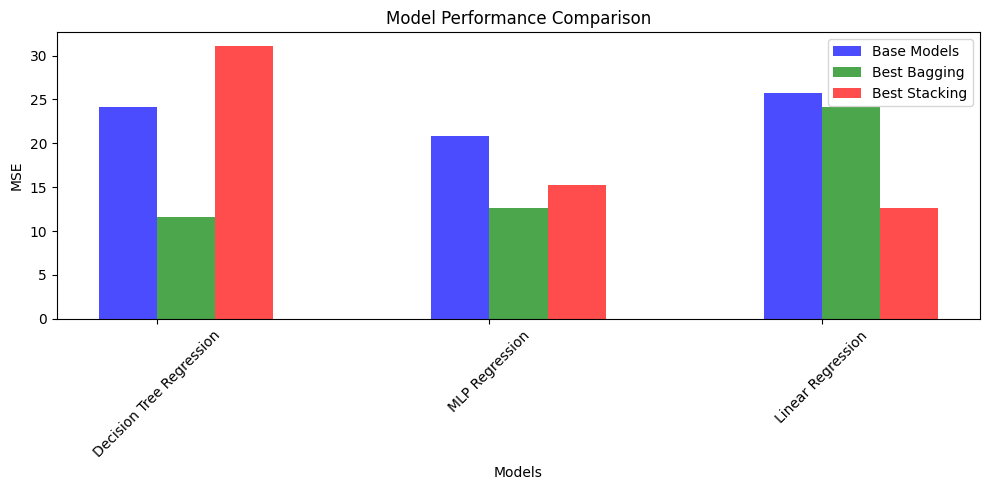